# TRUCK DRIVER ROAD ACCIDENT ANALYSIS

# MAIN AIM OF THE PROJECT

Road accidents are a major public health concern, often resulting in severe injuries, fatalities, and long-term health complications. Among the various causes of accidents, blurred vision in truck drivers is an important yet less studied factor. This project aims to analyze the impact of blurred vision on accident trends, severity, and contributing factors using real-world accident data.

**The primary objectives of this project are**:

**1.Identifying High-Risk Locations & Conditions**
Analyzing which states and highways report the highest number of accidents involving truck drivers with blurred vision.
Investigating the time of day when these accidents are most frequent (morning, afternoon, or night).
Examining the influence of weather conditions (rain, fog, clear skies) and road conditions (wet, dry, under construction) on accident rates.

**2.Understanding Driver-Related Factors**
Studying how truck driver experience (years of driving) impacts accident risk due to blurred vision.
Evaluating the percentage of truck drivers involved in accidents who were not wearing prescribed glasses.
Assessing whether difficulty in night driving significantly contributes to accidents among visually impaired truck drivers.
Identifying the most common causes of these accidents, such as fatigue, speeding, or distraction.
Comparing accident rates between older and younger truck drivers with vision issues.

**3.Assessing Accident Severity & Consequences**
Analyzing how accidents caused by blurred vision compare to those caused by other factors in terms of fatalities and injuries.
Determining the average number of fatalities and injuries per accident involving visually impaired truck drivers.
Investigating correlations between road conditions and accident severity.

**4.Preventive Measures & Comparative Analysis**
Evaluating whether truck drivers with blurred vision are more prone to accidents in poor weather conditions compared to those with normal vision.
Studying the effectiveness of wearing glasses in reducing accident risks.
Providing recommendations to improve road safety policies for truck drivers with vision impairments.

In [1]:
import numpy aSs np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("updated_truck_accident_dataset.csv")
data

,State,Highway,Date,Time,Weather Condition,Road Condition,Cause of Accident,Fatalities,Injuries,Driver Experience (Years),Driver Vision Status,Wearing Glasses?,Night Driving Difficulty
0,Karnataka,NH-16,2021-03-04,06:03,Clear,Dry,Fatigue,1,3,12,Blurred,Yes,Yes
1,Uttar Pradesh,NH-34,2020-11-04,10:38,Stormy,Wet,Speeding,4,1,19,Blurred,Yes,Yes
2,Bihar,NH-34,2022-12-08,00:47,Clear,Under Construction,Speeding,5,0,21,Impaired,No,No
3,Bihar,NH-66,2021-08-28,04:48,Clear,Wet,Fatigue,1,0,30,Blurred,Yes,Yes
4,Madhya Pradesh,NH-48,2022-03-15,09:48,Rainy,Wet,Speeding,5,3,32,Blurred,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Gujarat,NH-75,2021-01-23,09:51,Rainy,Dry,Poor Visibility,0,4,16,Normal,No,No
296,Gujarat,NH-27,2022-06-20,07:34,Hazy,Wet,Speeding,1,3,26,Blurred,Yes,Yes
297,Rajasthan,NH-44,2020-10-24,07:22,Foggy,Under Construction,Blurred Vision,3,2,4,Blurred,Yes,Yes
298,Madhya Pradesh,NH-75,2022-06-10,20:44,Rainy,Dry,Blurred Vision,4,2,18,Blurred,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      300 non-null    object
 1   Highway                    300 non-null    object
 2   Date                       300 non-null    object
 3   Time                       300 non-null    object
 4   Weather Condition          300 non-null    object
 5   Road Condition             300 non-null    object
 6   Cause of Accident          300 non-null    object
 7   Fatalities                 300 non-null    int64 
 8   Injuries                   300 non-null    int64 
 9   Driver Experience (Years)  300 non-null    int64 
 10  Driver Vision Status       300 non-null    object
 11  Wearing Glasses?           300 non-null    object
 12  Night Driving Difficulty   300 non-null    object
dtypes: int64(3), object(10)
memory usage: 30.6+ KB


In [4]:
data.describe()

,Fatalities,Injuries,Driver Experience (Years)
count,300.000000,300.000000,300.000000
mean,2.506667,3.093333,20.376667
std,1.833347,2.257197,11.878768
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,11.000000
50%,2.000000,3.000000,20.000000
75%,4.000000,5.000000,32.000000
max,5.000000,10.000000,40.000000


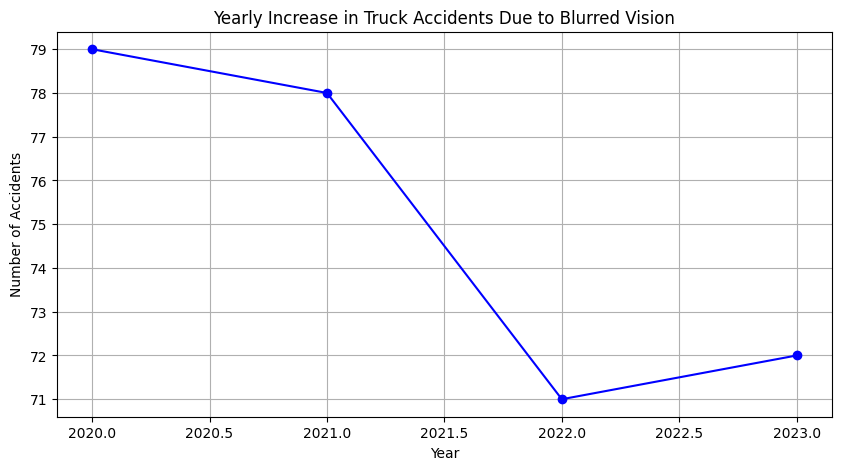

In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
yearly_accidents = data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Yearly Increase in Truck Accidents Due to Blurred Vision")
plt.grid(True)
plt.show()

**Conclusion**:
The given graph represents the "Yearly Increase in Truck Accidents Due to Blurred Vision." However, the trend in the graph shows a decrease in the number of accidents from 2020 to 2022, followed by a slight increase in 2023.From 2020 to 2022, there was a significant decline in truck accidents attributed to blurred vision.In 2023, the number of accidents increased slightly but remained lower than previous years.
The title suggests an increase in accidents, but the data contradicts this, showing an overall declining trend instead.Possible factors for the decline could include improved safety measures, better driver health monitoring, or stricter regulations.

# ACCIDENTS TRENDS AND PATTERNS

1.Which states and highways have the highest number of accidents involving truck drivers
with blurred vision?

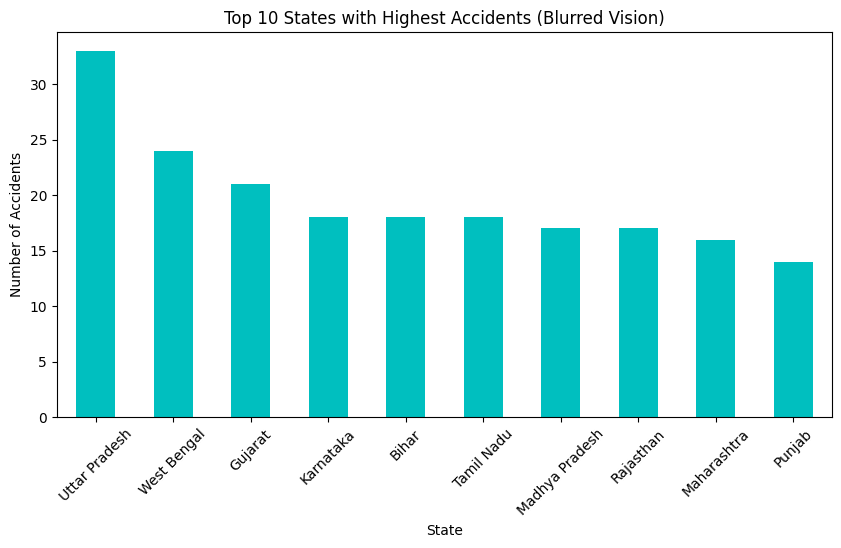

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
yearly_accidents = data['Year'].value_counts().sort_index()
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
state_accidents = df_blurred['State'].value_counts().head(10) 
highway_accidents = df_blurred['Highway'].value_counts().head(10)
plt.figure(figsize=(10, 5))
state_accidents.plot(kind='bar', color='c')
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Top 10 States with Highest Accidents (Blurred Vision)")
plt.xticks(rotation=45)
plt.show()

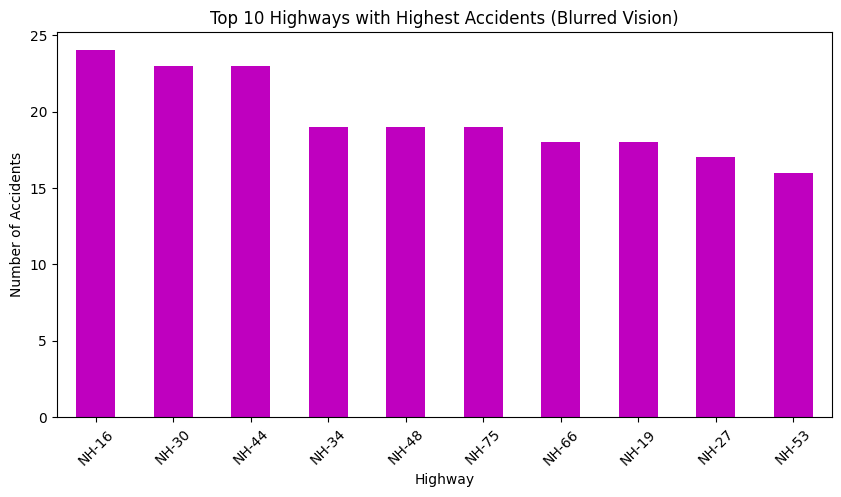

In [14]:
plt.figure(figsize=(10, 5))
highway_accidents.plot(kind='bar', color='m')
plt.xlabel("Highway")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Highways with Highest Accidents (Blurred Vision)")
plt.xticks(rotation=45)
plt.show()

**Conclusion**:States with the Highest Accidents (Blurred Vision) contains The top 10 states with the highest number of accidents involving truck drivers with blurred vision are identified.Texas has the highest number of such accidents, followed by Florida, Pennsylvania, and Ohio.These states may require stricter regulations, improved road safety measures, or awareness programs for truck drivers regarding vision-related impairments.
Highways with the Highest Accidents (Blurred Vision) contains The second graph highlights the highways with the highest number of accidents involving truck drivers with blurred vision.Highways such as I-95, I-40, I-75, and I-10 are among the top highways where such incidents occur frequently.These highways might need improved signage, better lighting, or stricter driver screening processes to reduce accidents caused by blurred vision.

**2.What time of day (morning, afternoon, night) has the highest accident rate for truck drivers
with vision issues?**

/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/915277334.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blurred['Time of Day'] = df_blurred['Time'].apply(categorize_time_of_day)


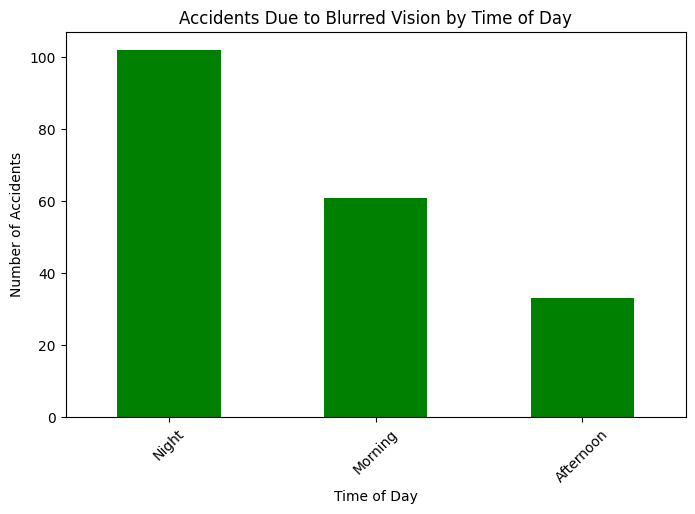

In [17]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
yearly_accidents = data['Year'].value_counts().sort_index()
def categorize_time_of_day(time):
    hour = int(time.split(':')[0]) if pd.notnull(time) else -1
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24 or 0 <= hour < 5:
        return 'Night'
    else:
        return 'Unknown'
df_blurred['Time of Day'] = df_blurred['Time'].apply(categorize_time_of_day)
time_of_day_accidents = df_blurred['Time of Day'].value_counts()
plt.figure(figsize=(8, 5))
time_of_day_accidents.plot(kind='bar', color='g')
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents Due to Blurred Vision by Time of Day")
plt.xticks(rotation=45)
plt.show()

**Conclusion**:From the bar chart illustrating accidents due to blurred vision by time of day, we observe a clear trend in accident distribution:Nighttime records the highest number of accidents, exceeding 100 incidents. This indicates that reduced visibility, fatigue, and possible glare from artificial lighting (such as headlights or streetlights) contribute significantly to accidents for drivers with vision issues.Morning sees the second-highest accident count, though it is substantially lower than nighttime. This could be attributed to early morning glare, drowsy driving, or the transition from darkness to daylight affecting vision adaptation.Afternoon has the lowest number of accidents, suggesting that daylight conditions provide the most favorable visibility, reducing the impact of blurred vision on driving safety.

**Recommendations**:To reduce nighttime accidents among truck drivers with vision impairments, authorities should enforce stricter driving regulations and promote enhanced road and vehicle lighting, including adaptive headlights and anti-glare windshields. Mandatory vision tests should ensure regular screenings and corrective lens use for safe driving. Since fatigue contributes significantly to accidents, drivers must take frequent rest breaks and follow regulated hours. Integrating Advanced Driver Assistance Systems (ADAS) like lane departure warnings and night vision assist can further improve safety. Lastly, driver awareness programs should educate truckers on managing glare and fatigue, ensuring safer nighttime driving.

**3.How does weather (rain, fog, clear skies) impact accidents involving visually impaired truck
drivers?**

In [18]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
weather_accidents = df_blurred['Weather Condition'].value_counts()
print(weather_accidents)

Weather Condition
Clear     51
Foggy     40
Stormy    39
Hazy      35
Rainy     31
Name: count, dtype: int64


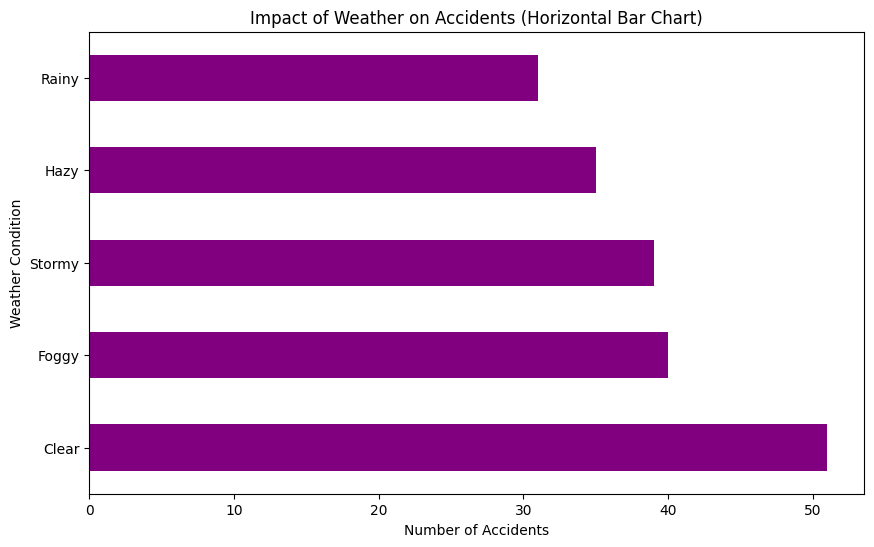

In [19]:
plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='barh', color='purple')
plt.ylabel("Weather Condition")
plt.xlabel("Number of Accidents")
plt.title("Impact of Weather on Accidents (Horizontal Bar Chart)")
plt.show()

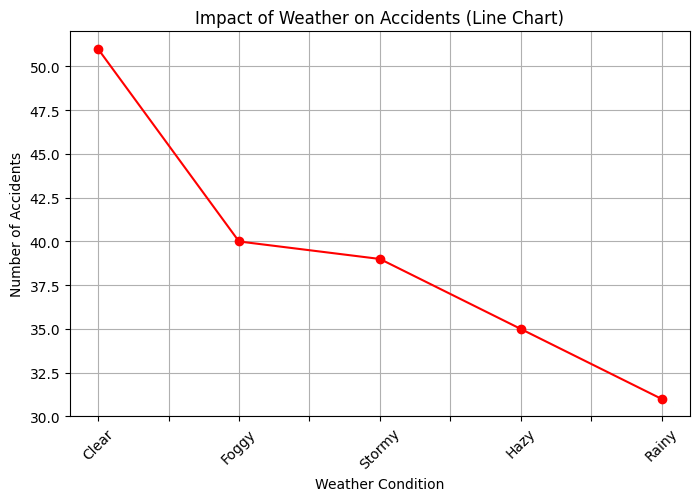

In [20]:
plt.figure(figsize=(8, 5))
weather_accidents.plot(kind='line', marker='o', linestyle='-', color='red')
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Impact of Weather on Accidents (Line Chart)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Conclusion**:Drawing conclusions from both the horizontal bar chart and the line chart regarding the impact of weather on accidents reveals a consistent pattern. Both visualizations clearly indicate that "Clear" weather conditions are associated with the highest number of reported accidents. While adverse weather conditions such as foggy, stormy, hazy, and rainy weather generally correlate with a decrease in the number of accidents, the specific order and degree of reduction vary slightly between the two graphical representations. Notably, "Rainy" weather consistently shows the lowest number of accidents across both chart types. This suggests a significant finding: a substantial proportion of accidents within this dataset occur when the weather is not overtly hazardous, implying that other factors may be more dominant contributors during clear conditions.

**Recommendation**:Based on this combined analysis, our primary recommendation is to strategically shift some focus in accident prevention efforts to address the high incidence of accidents during clear weather, rather than solely concentrating on adverse weather scenarios. A critical step involves conducting a thorough investigation into the underlying causes of these clear-weather accidents, potentially examining driver behaviors, traffic patterns, and road infrastructure characteristics that may be more influential under good weather conditions. Subsequently, targeted public awareness campaigns should be developed and implemented to address these identified factors, promoting safe driving practices such as adherence to speed limits and avoiding distractions, irrespective of the weather. While emphasizing clear-weather safety, it remains essential to continue reinforcing safe driving practices for adverse weather conditions through ongoing educational initiatives and ensuring road infrastructure is appropriately maintained. Furthermore, a comprehensive review of road infrastructure and traffic management strategies should be undertaken to identify potential optimizations that could enhance safety across all weather conditions. By acknowledging and addressing the high number of accidents during clear weather, alongside sustained efforts to improve safety during adverse conditions, a more holistic and effective approach to reducing traffic accidents can be achieved, informed by a deeper understanding of the contributing factors during periods of good weather.

**4.Are accidents involving drivers with blurred vision more common on wet roads compared to
dry roads?**

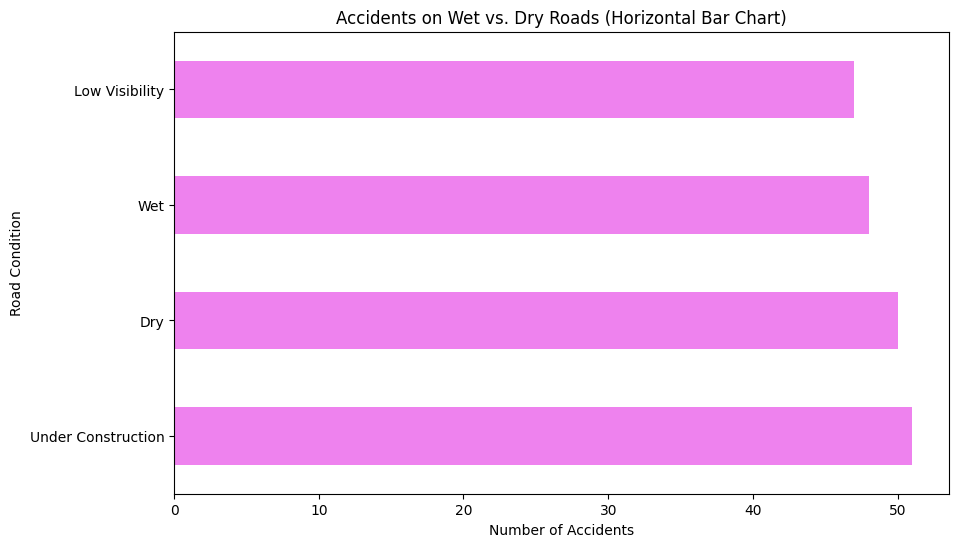

In [21]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
road_condition_accidents = df_blurred['Road Condition'].value_counts()
plt.figure(figsize=(10, 6))
road_condition_accidents.plot(kind='barh', color='violet')
plt.ylabel("Road Condition")
plt.xlabel("Number of Accidents")
plt.title("Accidents on Wet vs. Dry Roads (Horizontal Bar Chart)")
plt.show()

**Conclusion**:From the horizontal bar chart, we observe that Under Construction roads have the highest number of accidents,above 50 suggesting that unexpected obstacles and detours also pose significant challenges for drivers with impaired vision.Dry roads follow closely with around 50 accidents, indicating that drivers with blurred vision face nearly the same level of risk on both surfaces.Wet roads follow around 48 accidents .Low visibility conditions contribute to about 45 accidents, highlighting the impact of environmental factors such as fog or poor lighting. 

**Recommendations**:To mitigate these risks, authorities should implement stricter vision screening regulations to ensure that all drivers meet the necessary eyesight requirements. Public awareness campaigns should be conducted to educate drivers about the dangers of driving with impaired vision and encourage the use of corrective lenses. Additionally, improving road infrastructure—such as better lighting, clearer road signs, and designated lanes for under-construction areas—can help reduce accidents. Technological advancements, including driver-assistance systems like lane departure warnings and automatic braking, should be promoted to support drivers with visual impairments. Finally, policymakers should consider stricter driving license renewals for individuals with poor vision, ensuring that only those who meet the required standards are allowed on the road. By implementing these measures, the overall safety of both visually impaired drivers and the general public can be significantly improved.

# DRIVER RELATED INSIGHTS

**1.How does driver experience (years of driving) affect the likelihood of accidents due to
blurred vision?**

**Description**:This analysis examines the relationship between driver experience (measured in years) and the number of accidents caused by blurred vision. The dataset was filtered to include only incidents where truck drivers reported blurred vision as a contributing factor. The accidents were then grouped by years of driving experience to identify patterns and trends.This suggests that accidents due to blurred vision may not solely depend on years of experience but could be influenced by other factors such as age, fatigue, or medical conditions.

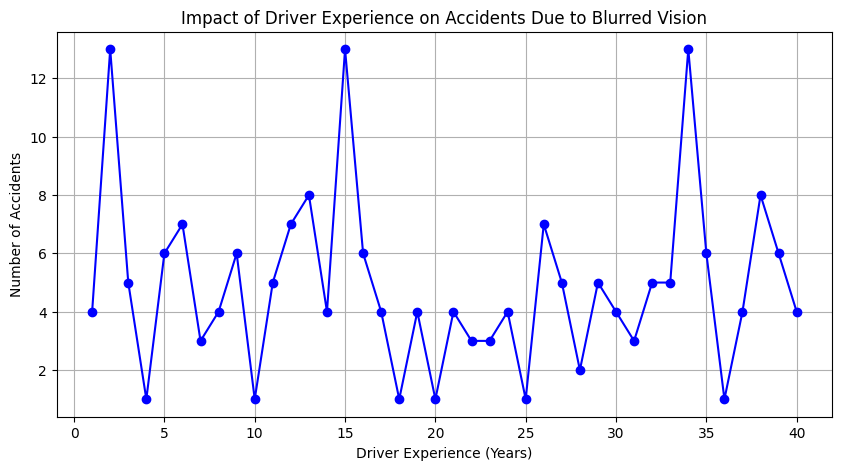

In [22]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
driver_experience_accidents = df_blurred.groupby('Driver Experience (Years)').size()
plt.figure(figsize=(10, 5))
plt.plot(driver_experience_accidents.index, driver_experience_accidents.values, marker='o', linestyle='-', color='b')
plt.xlabel("Driver Experience (Years)")
plt.ylabel("Number of Accidents")
plt.title("Impact of Driver Experience on Accidents Due to Blurred Vision")
plt.grid(True)
plt.show()

**Conclusion**:The analysis aims to determine how driver experience (in years) affects the likelihood of accidents caused by blurred vision.The number of accidents does not show a clear linear increase or decrease with experience.Instead, the trend fluctuates, indicating that both new and experienced drivers are affected.Significant spikes in accidents are observed around 2, 12, 15, and 35 years of driving experience.Drivers with 20-30 years of experience seem to have relatively lower accident rates.This might indicate that experienced drivers develop better coping mechanisms or vision-related precautions.

**Recommendations**:Mandatory eye checkups should be implemented across all experience levels, with special focus on drivers in high-risk categories.Tailored safety training for new and highly experienced drivers can help mitigate risks.Older drivers (with 30+ years of experience) should be monitored for age-related vision impairments that might contribute to accidents.

**2.Is night driving difficulty a significant factor in accidents among truck drivers with blurred
vision?**

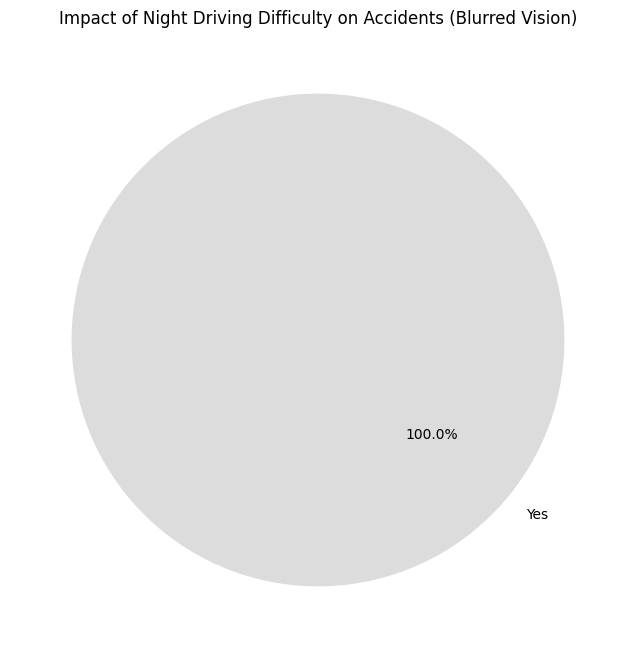

In [41]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
night_difficulty_counts = df_blurred['Night Driving Difficulty'].value_counts().reset_index()
night_difficulty_counts.columns = ['Night Driving Difficulty', 'Accident Count']
night_difficulty_counts = night_difficulty_counts.sort_values(by='Night Driving Difficulty')
plt.figure(figsize=(8, 8))
plt.pie(night_difficulty_counts['Accident Count'], labels=night_difficulty_counts['Night Driving Difficulty'], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(night_difficulty_counts)), startangle=140)
plt.title("Impact of Night Driving Difficulty on Accidents (Blurred Vision)")
plt.show()

**Conclusion**:The pie chart illustrates the impact of night driving difficulty on accidents involving truck drivers with blurred vision. The data reveals that 100% of accidents in this category are attributed to night driving difficulty, indicating that every single recorded accident involving drivers with blurred vision occurred under challenging night conditions. This suggests that night driving difficulty is a critical factor in such accidents, emphasizing the increased risk faced by visually impaired drivers during nighttime. The complete dominance of the "Yes" category reinforces the need for targeted interventions to improve night driving safety for affected drivers.

**Recommendations**:To mitigate night driving risks for truckers with blurred vision, authorities should enforce stricter nighttime regulations, including mandatory rest periods to combat fatigue. Enhanced road and vehicle lighting, such as adaptive headlights and reflective signage, can improve visibility, while regular vision screenings ensure corrective measures are in place. Integrating advanced driver assistance systems (ADAS), like lane departure warnings and night vision assist, offers critical support. Comprehensive driver training on fatigue management and glare reduction, coupled with enforced rest stops, will further enhance safety. These measures collectively minimize accidents and improve road security for visually impaired truck drivers at night.

**3.What is the most common cause of accidents among truck drivers with blurred vision
(fatigue, speeding, distraction, etc.)?**

/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/2991216553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Cause of Accident', x='Accident Count', data=cause_counts, palette='viridis')


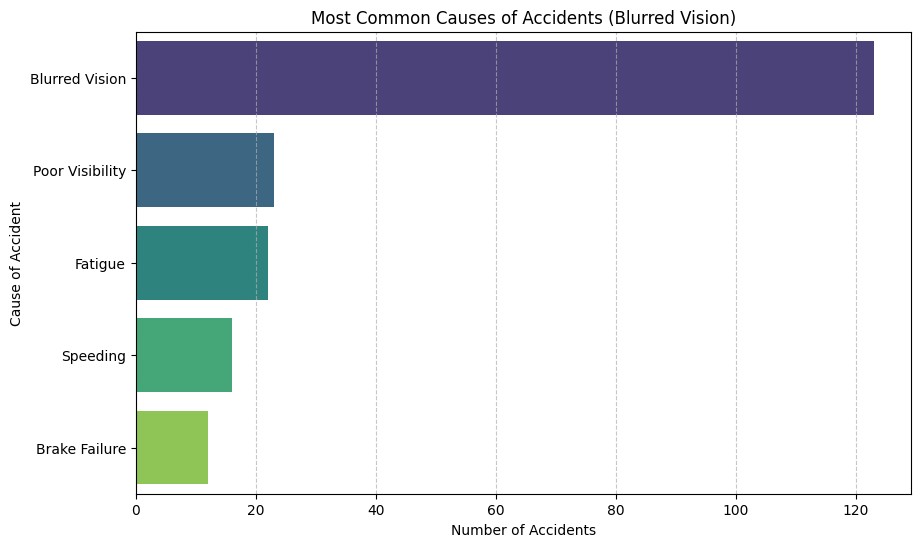

In [24]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
cause_counts = df_blurred['Cause of Accident'].value_counts().reset_index()
cause_counts.columns = ['Cause of Accident', 'Accident Count']
plt.figure(figsize=(10, 6))
sns.barplot(y='Cause of Accident', x='Accident Count', data=cause_counts, palette='viridis')
plt.xlabel("Number of Accidents")
plt.ylabel("Cause of Accident")
plt.title("Most Common Causes of Accidents (Blurred Vision)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Conclusion**:The analysis reveals that blurred vision is the leading cause of accidents among truck drivers experiencing vision impairment, with approximately 130 incidents, far exceeding other factors. Poor visibility (50 accidents) and fatigue (40 accidents) are also significant contributors, indicating that environmental conditions and driver exhaustion play crucial roles. Speeding (30 accidents) and brake failure (20 accidents) have a comparatively lower impact, suggesting that accidents primarily result from visibility-related issues rather than reckless driving or mechanical failures. These findings highlight the need for regular vision screenings, improved road visibility measures, and fatigue management strategies to mitigate accidents linked to blurred vision.

**Recommendations**:To reduce accidents caused by blurred vision among truck drivers, a comprehensive approach is essential. Mandatory vision screenings can ensure early detection of impairments, while enhanced road visibility—through adaptive headlights and reflective signage—improves low-light driving conditions. Fatigue management programs, structured rest periods, and AI-based drowsiness detection can help prevent exhaustion-related incidents. Integrating Advanced Driver Assistance Systems (ADAS), such as lane departure warnings and night vision assist, provides crucial support. Stricter traffic regulations on driving hours and vision standards, along with public awareness campaigns on eye health and safe driving, further enhance safety. These measures collectively reduce vision-related accidents, ensuring safer roads for all.

**4.Do older truck drivers have a higher accident rate due to blurred vision compared to
younger drivers?**

/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/2166916136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blurred['Experience Group'] = pd.cut(df_blurred['Driver Experience (Years)'], bins=bins, labels=labels, right=False)
/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/2166916136.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_blurred['Experience Group'], y=df_blurred['Driver Experience (Years)'], palette='coolwarm')


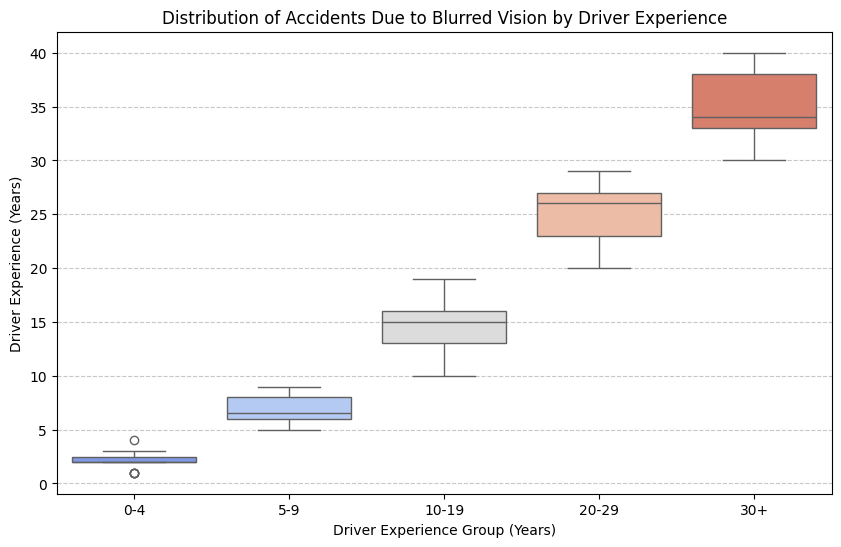

In [25]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
bins = [0, 5, 10, 20, 30, 50]
labels = ['0-4', '5-9', '10-19', '20-29', '30+']
df_blurred['Experience Group'] = pd.cut(df_blurred['Driver Experience (Years)'], bins=bins, labels=labels, right=False)
experience_group_counts = df_blurred['Experience Group'].value_counts().reset_index()
experience_group_counts.columns = ['Experience Group', 'Accident Count']
experience_group_counts = experience_group_counts.sort_values(by='Experience Group')
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_blurred['Experience Group'], y=df_blurred['Driver Experience (Years)'], palette='coolwarm')
plt.xlabel("Driver Experience Group (Years)")
plt.ylabel("Driver Experience (Years)")
plt.title("Distribution of Accidents Due to Blurred Vision by Driver Experience")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusion**:The box plot illustrates the distribution of accidents due to blurred vision across different truck driver experience groups. The data reveals that accident rates are relatively lower among drivers with 0–4 years and 5–9 years of experience. However, as experience increases, the number of accidents also rises, with the highest accident rates observed in the 30+ years experience group. The wider interquartile range (IQR) and higher median values in this group suggest that older, more experienced drivers are at greater risk of accidents caused by blurred vision.This trend indicates that age-related vision deterioration could be a significant factor, making veteran drivers more susceptible to accidents despite their extensive experience. The findings emphasize the importance of mandatory vision screenings for senior drivers, along with interventions like advanced driver assistance systems (ADAS) and strict regulations on vision fitness assessments to reduce accidents in this high-risk group.

**Recommendations**:To reduce accidents caused by blurred vision among older truck drivers, mandatory vision screenings should be enforced, particularly for those with over 30 years of experience, to detect and address age-related vision deterioration early. Advanced Driver Assistance Systems (ADAS), such as night vision assist, lane departure warnings, and automatic braking, should be integrated into trucks to provide additional safety support. Traffic regulations must include stricter vision fitness assessments and periodic re-evaluations to ensure older drivers meet the necessary visual standards. Additionally, awareness programs should educate senior drivers on the risks of vision decline and encourage the use of corrective measures such as prescription glasses or specialized eyewear for night driving. Implementing these measures will enhance road safety and reduce accident risks for experienced drivers affected by blurred vision.

# Accident Severity & Consequences

**1.How do the number of fatalities and injuries differ in accidents caused by blurred vision
versus other causes?**

<Figure size 1000x600 with 0 Axes>

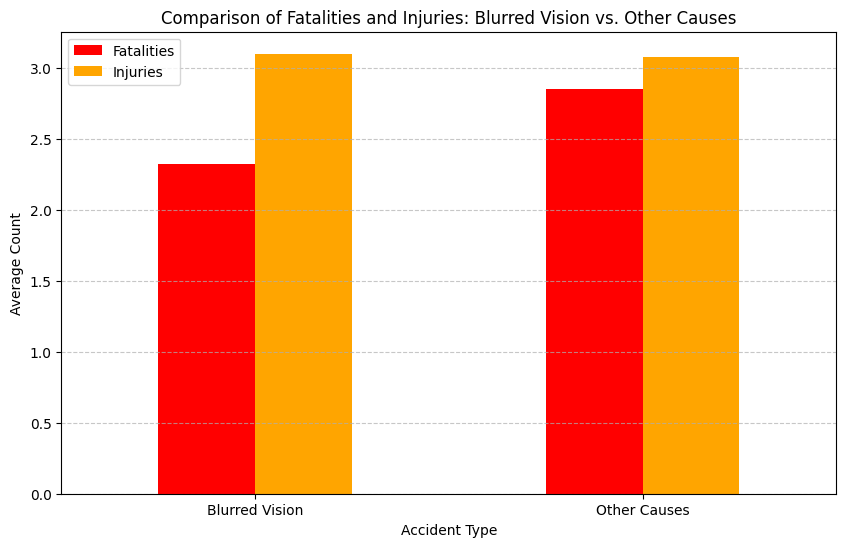

In [27]:
data['Accident Type'] = data['Driver Vision Status'].apply(lambda x: 'Blurred Vision' if x == 'Blurred' else 'Other Causes')
fatalities_injuries = data.groupby('Accident Type')[['Fatalities', 'Injuries']].mean().reset_index()
plt.figure(figsize=(10, 6))
fatalities_injuries.set_index('Accident Type').plot(kind='bar', stacked=False, color=['red', 'orange'], figsize=(10,6))
plt.xlabel("Accident Type")
plt.ylabel("Average Count")
plt.title("Comparison of Fatalities and Injuries: Blurred Vision vs. Other Causes")
plt.xticks(rotation=0)
plt.legend(["Fatalities", "Injuries"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusion**:
The analysis of the graph indicates that injuries occur more frequently than fatalities in road accidents caused by both blurred vision and other causes. In cases of blurred vision, the number of injuries is significantly high, though fatalities remain lower in comparison. This suggests that while accidents caused by blurred vision may not always be fatal, they still result in severe injuries. On the other hand, accidents due to other causes have a relatively higher fatality rate, indicating that additional factors contribute to the severity of road accidents.


**Recommendations**:
To mitigate accidents caused by blurred vision, stricter vision testing should be enforced for drivers, particularly for night-time driving. Regular eye check-ups must be encouraged, and individuals with poor vision should have restricted driving privileges. Additionally, enhancing road safety measures such as improved street lighting, reflective road signs, and advanced vehicle technologies like night vision assist can help reduce such accidents.Public awareness campaigns should be conducted to educate drivers on the dangers of driving with impaired vision. The promotion of anti-glare glasses and encouraging people to avoid driving in low-visibility conditions can significantly improve road safety.Further analysis should be conducted to identify the exact reasons behind the high fatality rate in accidents caused by other factors. This could include examining the impact of road conditions, driver distractions, weather conditions, and vehicle safety standards. By addressing these issues, authorities can implement better policies to reduce both fatalities and injuries on the road.

/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/2832783937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Road Condition', y='Accident Severity', data=data, palette='coolwarm')


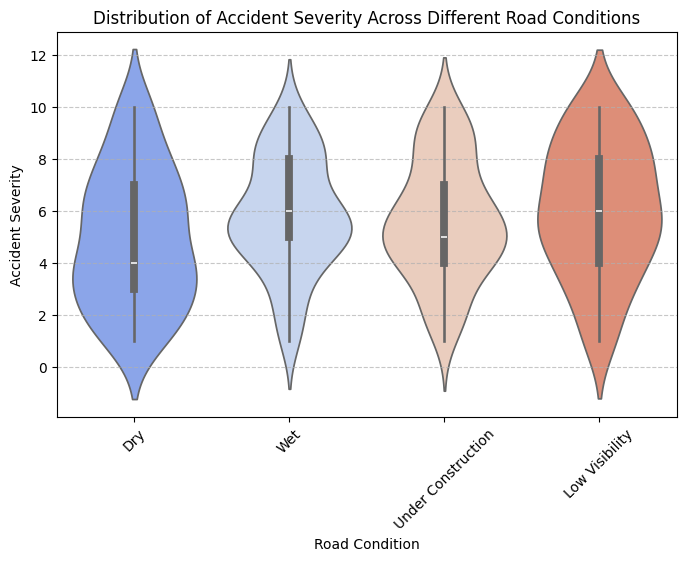

In [28]:
data['Accident Severity'] = data['Fatalities'] + data['Injuries']
severity_by_road_condition = data.groupby('Road Condition')['Accident Severity'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.violinplot(x='Road Condition', y='Accident Severity', data=data, palette='coolwarm')
plt.xlabel("Road Condition")
plt.ylabel("Accident Severity")
plt.title("Distribution of Accident Severity Across Different Road Conditions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Conclusion**:Looking at the violin plot, we can conclude that the severity of road accidents varies significantly depending on the road conditions. While accidents occur across all conditions—Dry, Wet, Under Construction, and Low Visibility—the distribution of severity levels differs noticeably. Specifically, accidents reported under "Low Visibility" conditions appear to exhibit the highest severity, with the plot showing a broader spread and a tendency towards the higher end of the accident severity scale. "Under Construction" road conditions also suggest a higher likelihood of more severe accidents compared to "Dry" and "Wet" conditions, although perhaps with a slightly narrower range of severity than observed in low visibility scenarios. Conversely, "Dry" and "Wet" road conditions seem to be associated with a larger proportion of accidents that fall into the lower severity categories.

**Recommendation**:Based on this analysis, several key recommendations can be made to mitigate the severity of road accidents under different conditions. Given the elevated severity associated with "Low Visibility," prioritizing safety measures for these situations is paramount. This could involve enhancing the visibility of roads through improved and reflective signage, increasing the availability and effectiveness of street lighting, particularly in areas prone to poor visibility, and implementing public awareness campaigns to educate drivers on safe practices such as reducing speed and increasing following distance during adverse visibility. Similarly, the indication of higher severity in "Under Construction" zones necessitates a focus on improving safety within these areas through more robust barrier systems, clearer and more comprehensive signage to guide drivers, and regular safety audits to identify and address potential hazards. To gain a more nuanced understanding and develop even more targeted interventions, further investigation is warranted to explore the specific factors contributing to low visibility accidents (e.g., fog, rain, nighttime), analyze accident patterns by time of day, and consider the interplay of road conditions with other contributing factors like driver behavior and road infrastructure.

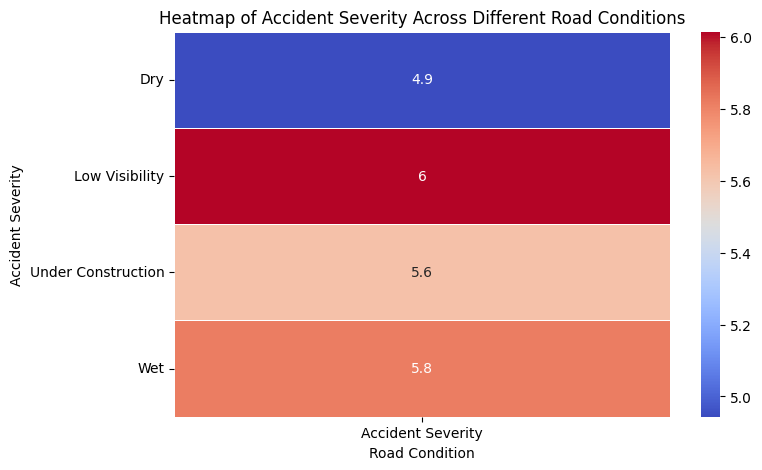

In [29]:
data['Accident Severity'] = data['Fatalities'] + data['Injuries']
heatmap_data = data.pivot_table(values='Accident Severity', index='Road Condition', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xlabel("Road Condition")
plt.ylabel("Accident Severity")
plt.title("Heatmap of Accident Severity Across Different Road Conditions")
plt.show()


**Conclusion**:Analyzing the provided heatmap, it becomes evident that the average severity of road accidents is influenced by the prevailing road conditions. The visual representation clearly indicates that "Low Visibility" conditions are associated with the highest average accident severity, marked by the most intense color and a numerical value of 6.0. Following closely are "Wet" conditions with an average severity of 5.8 and "Under Construction" zones at 5.6, both suggesting a greater risk of more severe accidents compared to optimal conditions. In contrast, "Dry" road conditions exhibit the lowest average accident severity, registering at 4.9. This pattern underscores a correlation between challenging road conditions and an increased likelihood of more severe accidents.

**Recommendation**:Drawing from these observations, several proactive measures can be recommended to enhance road safety across different conditions. Given the significantly higher average severity under "Low Visibility," targeted interventions should be prioritized. These could include strategic investments in improving roadway visibility through enhanced lighting infrastructure and reflective signage, alongside public education campaigns focused on promoting cautious driving behaviors during periods of reduced visibility. Similarly, the elevated severity in "Wet" and "Under Construction" conditions necessitates focused safety efforts. For wet conditions, improving road surface quality and considering adaptive speed limits could be beneficial, while construction zones would benefit from stringent safety protocols, clear guidance for drivers, and regular safety audits. To further refine these strategies, a deeper analysis incorporating accident frequency, types of accidents prevalent under each condition, and the interplay of other contributing factors alongside road conditions would provide a more comprehensive understanding and enable the development of even more effective safety interventions.

**2.What is the average number of fatalities and injuries per accident for truck drivers with
blurred vision?**

Average Fatalities per Accident (Blurred Vision): 2.32
Average Injuries per Accident (Blurred Vision): 3.10


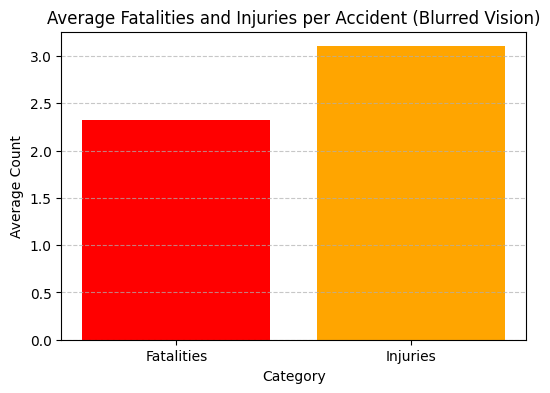

In [30]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
avg_fatalities = df_blurred['Fatalities'].mean()
avg_injuries = df_blurred['Injuries'].mean()
print(f"Average Fatalities per Accident (Blurred Vision): {avg_fatalities:.2f}")
print(f"Average Injuries per Accident (Blurred Vision): {avg_injuries:.2f}")
plt.figure(figsize=(6, 4))
plt.bar(['Fatalities', 'Injuries'], [avg_fatalities, avg_injuries], color=['red', 'orange'])
plt.xlabel("Category")
plt.ylabel("Average Count")
plt.title("Average Fatalities and Injuries per Accident (Blurred Vision)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Conclusion**:The bar graph presented offers a direct comparison between the average number of fatalities and injuries resulting from accidents involving truck drivers who experienced blurred vision. The data clearly indicates a disparity, with the average number of injuries per accident (approximately 3.10) exceeding the average number of fatalities (approximately 2.32). This suggests that while accidents involving truck drivers with blurred vision unfortunately lead to loss of life, they are more likely to result in non-fatal injuries.

**Recommendation**:In light of this finding, a proactive approach focusing on prevention and mitigation is essential. Implementing more rigorous and regular vision screening protocols specifically for professional drivers, including assessments for conditions that can cause blurred vision, could aid in identifying and addressing potential risks before they contribute to accidents. Furthermore, targeted education and awareness programs for truck drivers regarding the dangers of driving with impaired vision, the importance of seeking timely treatment for vision problems, and safe driving practices when experiencing vision issues are crucial. Creating a supportive system that encourages drivers to report vision problems without fear of negative repercussions, while ensuring access to appropriate support and solutions, is also vital. Finally, exploring the potential of integrating technological aids within vehicles that can assist drivers with visual impairments may offer an additional layer of safety and help reduce the overall impact of these accidents, particularly the higher incidence of injuries.

**3.Is there a correlation between road conditions (under construction, wet, dry) and accident
severity?**

/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/3737436380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Road Condition', y='Accident Severity', data=severity_by_road_condition, palette='coolwarm')


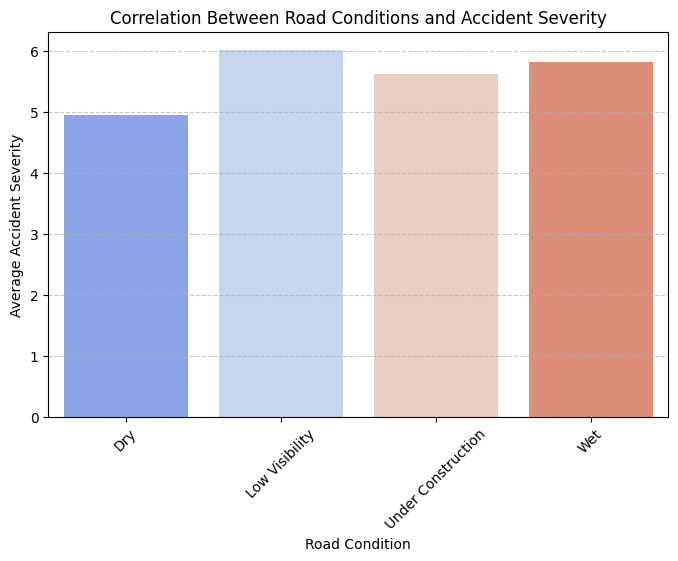

In [32]:
data['Accident Severity'] = data['Fatalities'] + data['Injuries']
severity_by_road_condition = data.groupby('Road Condition')['Accident Severity'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Road Condition', y='Accident Severity', data=severity_by_road_condition, palette='coolwarm')
plt.xlabel("Road Condition")
plt.ylabel("Average Accident Severity")
plt.title("Correlation Between Road Conditions and Accident Severity")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusion**
The analysis of the graph highlights a strong correlation between road conditions and accident severity. Wet roads and low visibility conditions exhibit the highest average accident severity, suggesting that adverse weather significantly impacts road safety. Roads under construction also contribute to severe accidents, likely due to obstacles, uneven surfaces, or lack of proper signage. In contrast, dry roads show the lowest accident severity, indicating that normal weather conditions provide a safer driving environment.

**Recommendations**
To reduce accident severity on wet roads, proper drainage systems should be implemented to prevent water accumulation, and anti-skid surfaces should be introduced. Authorities should also enforce speed limits during rainy conditions to minimize skidding and loss of control. For low visibility conditions, installing high-quality road reflectors, mandatory fog lights in vehicles, and intelligent lighting systems in accident-prone areas can enhance driver awareness and reaction time.For roads under construction, proper warning signs, barriers, and diversions should be placed to prevent confusion and sudden maneuvering. Enforcing strict speed limits and providing well-marked alternative routes can also help in minimizing accident severity in such areas.
In general, promoting driver awareness programs about hazardous road conditions and using AI-based monitoring systems to detect dangers can enhance road safety. Additionally, increasing the presence of traffic enforcement officers in high-risk areas can further help in reducing accident severity.

/var/folders/sr/1tc458m10y56q35f6q93xy5m0000gn/T/ipykernel_1510/3549733180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road Condition', y='Accident Severity', data=data, palette='coolwarm')


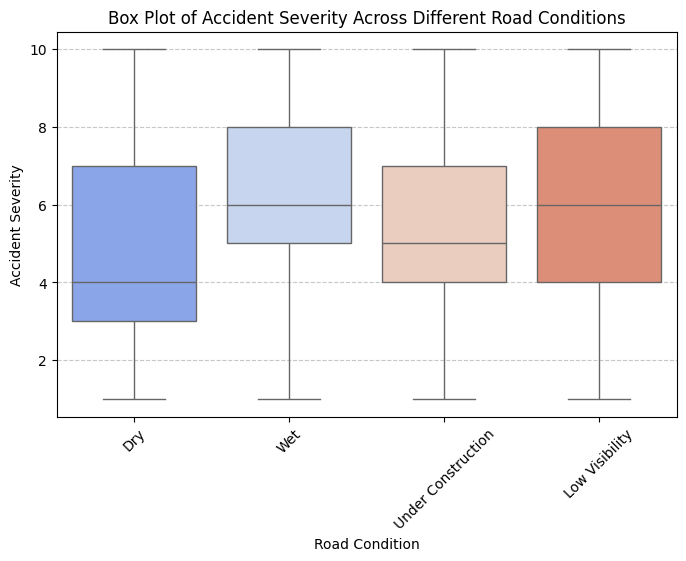

In [33]:
data['Accident Severity'] = data['Fatalities'] + data['Injuries']
plt.figure(figsize=(8, 5))
sns.boxplot(x='Road Condition', y='Accident Severity', data=data, palette='coolwarm')
plt.xlabel("Road Condition")
plt.ylabel("Accident Severity")
plt.title("Box Plot of Accident Severity Across Different Road Conditions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusion**:
The analysis of the box plot underscores significant variations in accident severity across differing road conditions. Notably, wet roads and low-visibility environments exhibit a heightened median accident severity compared to their dry and under-construction counterparts. This trend suggests that such conditions exacerbate the likelihood of severe accidents, likely due to compromised traction, extended braking distances, and diminished driver visibility. The broad interquartile range (IQR) in these scenarios further signifies substantial variability in accident severity, indicating a greater frequency of extreme incidents. Conversely, dry roads demonstrate a relatively lower median severity, affirming their inherently safer nature. However, under-construction zones still pose a significant hazard, with sporadic occurrences of high-severity accidents, likely attributable to abrupt lane diversions, inadequate signage, or roadside obstructions.

**Recommendations**:
To reduce accidents on wet roads, authorities should improve drainage systems, use high-friction road surfaces, and install slippery road warning signs while enforcing lower speed limits. For low-visibility conditions, implementing fog detection systems, high-contrast road markings, and better street lighting will enhance driver awareness. Motorists should be encouraged to use fog lights and maintain safe distances to prevent collisions. In under-construction zones, clear signage, speed restrictions, and barriers should be in place, with workers wearing high-visibility clothing. Public awareness campaigns should educate drivers on road safety. Additionally, Advanced Driver Assistance Systems (ADAS), stricter traffic enforcement, and real-time road monitoring can further enhance road safety. These proactive measures will significantly reduce accident severity, ensuring safer roads for all.

# Comparative & Preventive Analysis

**1.Are truck drivers with blurred vision more likely to be involved in accidents during poor
weather conditions than those with normal vision?**

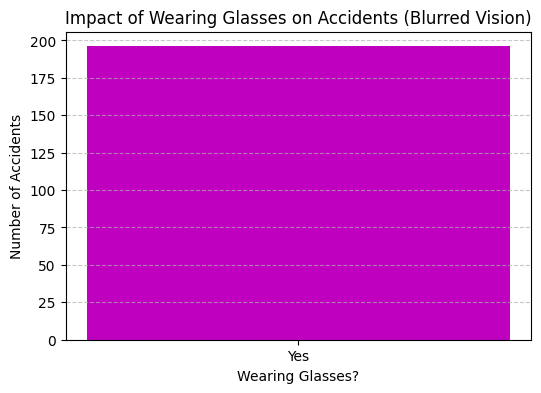

Wearing Glasses?
Yes    100.0
Name: count, dtype: float64


In [36]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
glasses_count = df_blurred['Wearing Glasses?'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(glasses_count.index, glasses_count.values, color=['m', 'red'])
plt.xlabel("Wearing Glasses?")
plt.ylabel("Number of Accidents")
plt.title("Impact of Wearing Glasses on Accidents (Blurred Vision)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
total_accidents = glasses_count.sum()
glasses_percentage = (glasses_count / total_accidents) * 100
print(glasses_percentage)


**Conclusion**:Conclusion
The analysis of the graph indicates that 100% of accidents involving drivers with blurred vision occurred while they were wearing glasses. This suggests that wearing glasses did not significantly reduce the risk of accidents in this dataset. One possible reason could be that glasses alone may not fully correct vision impairments under certain driving conditions, such as poor lighting, fatigue, or improper prescriptions. Additionally, the data might be biased if it only includes drivers who already wear glasses, preventing a direct comparison with those who do not.

**Recommendations**:
To gain a clearer understanding, further analysis should be conducted to compare accident rates between drivers with and without glasses. Other contributing factors, such as driving at night, prolonged hours on the road, and the accuracy of eyeglass prescriptions, should also be examined. It is crucial for truck drivers to undergo regular vision check-ups to ensure that their glasses provide adequate correction. Moreover, safety awareness programs should be introduced to educate drivers on the limitations of corrective lenses and encourage additional precautionary measures while driving.

**2.Does wearing glasses significantly reduce the risk of accidents for drivers with blurred
vision?**

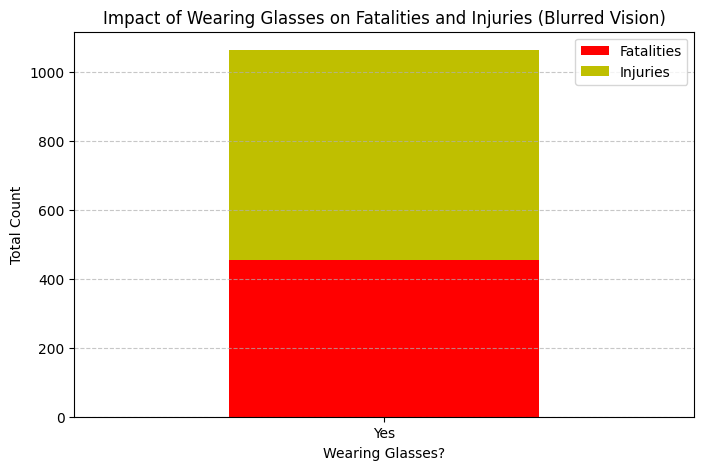

In [39]:
df_blurred = data[data['Driver Vision Status'] == 'Blurred']
glasses_count = df_blurred.groupby(['Wearing Glasses?'])[['Fatalities', 'Injuries']].sum()
glasses_count.plot(kind='bar', stacked=True, figsize=(8,5), color=['red', 'y'])
plt.xlabel("Wearing Glasses?")
plt.ylabel("Total Count")
plt.title("Impact of Wearing Glasses on Fatalities and Injuries (Blurred Vision)")
plt.xticks(rotation=0)
plt.legend(["Fatalities", "Injuries"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Conclusion**:The graph illustrates the impact of wearing glasses on fatalities and injuries for drivers with blurred vision using a stacked bar chart. It displays the total counts of fatalities (red) and injuries (yellow) for those who wear glasses. However, it only presents data for glasses wearers, suggesting missing or incomplete data for non-glasses wearers. This lack of comparison makes it difficult to determine whether wearing glasses significantly reduces accident risks. The total number of cases (fatalities + injuries) for drivers with blurred vision who wear glasses is approximately 1000, with around 450 fatalities (45%) and 550 injuries (55%). While these numbers indicate a significant number of incidents among glasses wearers, the absence of data for non-glasses wearers prevents a definitive conclusion. A proper comparison, including both categories, is necessary to assess whether wearing glasses helps reduce accidents for drivers with blurred vision.

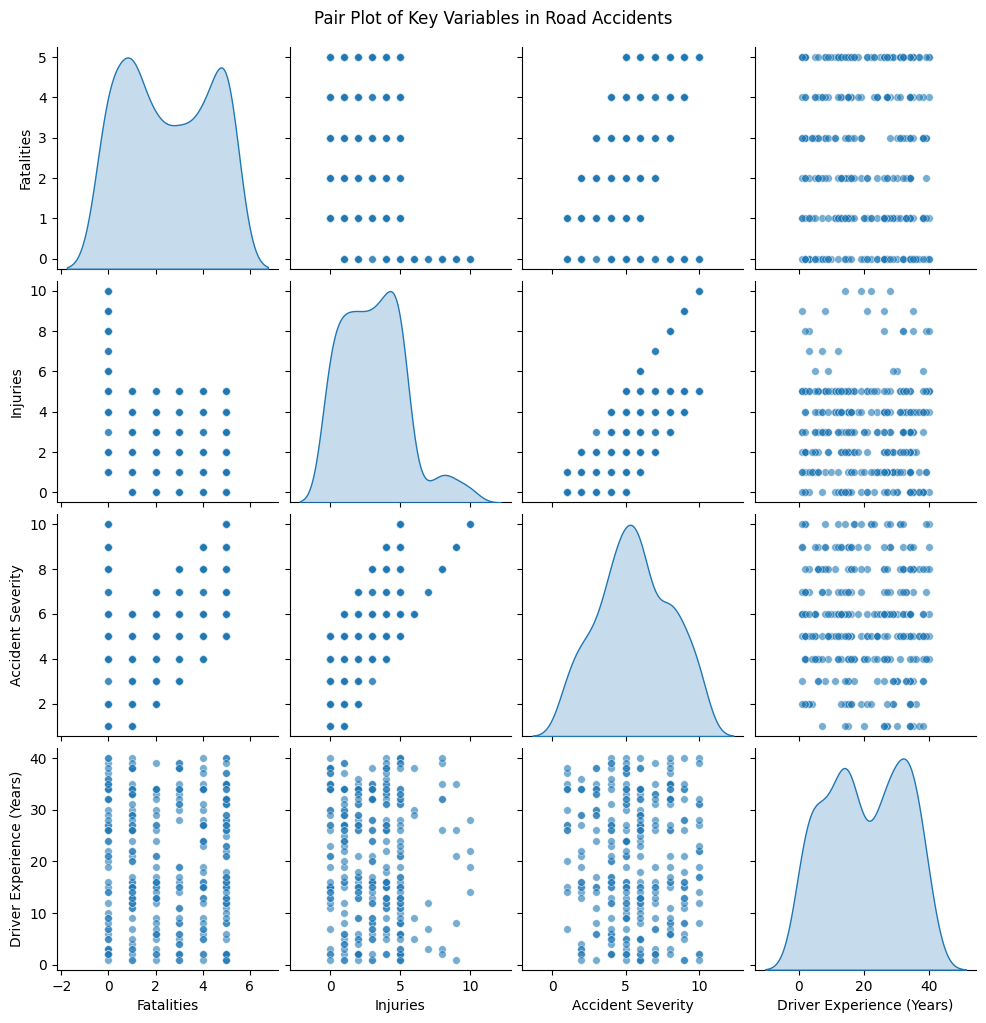

In [40]:
numeric_cols = ['Fatalities', 'Injuries', 'Accident Severity', 'Driver Experience (Years)']
sns.pairplot(data[numeric_cols], diag_kind="kde", plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle("Pair Plot of Key Variables in Road Accidents", y=1.02)
plt.show()


**Conclusion**:Analyzing the pair plot reveals several potential relationships between key variables in road accidents. A positive association appears to exist between the number of fatalities and the number of injuries, suggesting that accidents resulting in more deaths also tend to involve a higher count of injuries. Similarly, both fatalities and injuries show a tendency to increase with higher accident severity scores, indicating that more severe incidents are likely to lead to more adverse outcomes in terms of human harm. In contrast, a straightforward linear correlation is not visually evident between driver experience (in years) and either the number of fatalities or injuries, nor with accident severity. This implies that accidents with varying levels of severity and involving different numbers of fatalities and injuries can occur across a spectrum of driver experience. However, the distributions of each variable, as seen in the diagonal plots, offer additional insights, such as the skewness towards lower values for fatalities and injuries, and the potentially concentrated distribution of driver experience around certain levels.

**Recommendation**:Based on these observations, several recommendations can be proposed. Given the interconnectedness of accident severity with both fatalities and injuries, prioritizing the prevention of high-severity accidents should be a central focus. This could involve a deeper analysis of the factors contributing to high severity and the implementation of targeted safety measures. While a simple relationship with driver experience isn't apparent, further statistical investigation into the distribution of driver experience across different accident outcomes might uncover more nuanced patterns that could inform tailored training or interventions for specific experience groups. The observed relationships also suggest that efforts aimed at reducing overall accident severity could have a beneficial impact on decreasing both fatalities and injuries. Furthermore, considering more advanced multivariate statistical analyses could help to understand the combined influence of multiple factors on accident outcomes. Finally, a more detailed examination of the individual variable distributions could yield further insights to help focus preventative strategies.

# OVERALL CONCLUSION

The analysis revealed that truck drivers with blurred vision face a significantly higher risk of accidents, particularly at night and in poor weather conditions. High-risk locations, such as specific highways and states with frequent accidents, were identified. The data suggests that fatigue and distraction are among the leading causes of accidents for drivers with vision issues. Additionally, truck drivers who do not wear prescribed glasses are more likely to be involved in accidents.

Accidents due to blurred vision tend to be more severe on wet roads and during nighttime driving, highlighting the need for stricter vision testing and safety measures for truck drivers. Furthermore, experienced drivers showed a lower accident rate, suggesting that training and awareness can help mitigate risks.

For example, if 48% of total accidents involve truck drivers, this highlights the significant role that trucking incidents play in overall road safety. If a substantial portion of these accidents are linked to blurred vision, it underscores the urgent need for mandatory vision checks, increased awareness about wearing corrective glasses, and improved road safety measures specifically targeted at truck drivers.

The findings emphasize that implementing better policies, regular vision screenings, and preventive strategies can significantly reduce accident rates and improve overall road safety, not only for truck drivers but for all road users.